In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Enable inline plotting for Jupyter note.
%matplotlib inline

In [3]:
transform = transforms.ToTensor()

In [4]:
train_data_set = datasets.MNIST(root='Home Work./data', train=True, download=True, transform=transform)
test_data_set = datasets.MNIST(root='Home Work./data', train=False, download=True, transform=transform)
len(train_data_set)

60000

In [7]:
#train data set
train_data_set

Dataset MNIST
    Number of datapoints: 60000
    Root location: Home Work./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
#test data set
test_data_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: Home Work./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [10]:
train_data_loader = DataLoader(dataset=train_data_set, batch_size=500, shuffle=True)

test_data_loader = DataLoader(dataset=test_data_set, batch_size=100, shuffle=False)


In [11]:
# Function to compute the total number of trainable parameters in a model
def count_parameters(model):
    total_params = sum(param.numel() for param in model.parameters() if param.requires_grad)
    return total_params


In [12]:
# Neural network model with 1645 parameters
class SimpleModel(nn.Module):
    def __init__(self, input_size=784, hidden_layer1=2, hidden_layer2=5, output_size=10):
        super(SimpleModel, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_layer1)
        self.layer2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_size)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.output_layer(x)
        return x


In [14]:
simple_model = SimpleModel()


In [16]:
simple_model

SimpleModel(
  (layer1): Linear(in_features=784, out_features=2, bias=True)
  (layer2): Linear(in_features=2, out_features=5, bias=True)
  (output_layer): Linear(in_features=5, out_features=10, bias=True)
)

In [17]:
# Calculate and print the number of parameters in the simple_model
simple_model_params = count_parameters(simple_model)
print(simple_model_params)


1645


In [18]:
# Define the loss function using CrossEntropy
loss_function = nn.CrossEntropyLoss()


In [19]:
# Initialize the optimizer using Adam.
optimizer = torch.optim.Adam(simple_model.parameters(), lr=0.001)


In [20]:
# Number of epochs
num_epochs = 30
train_accuracy_mod1 = []
test_accuracy_mod1 = []

for epoch in range(num_epochs):
    correct_train = 0
    correct_test = 0

    # Print current epoch
    print(f"Epoch {epoch+1}/{num_epochs}")

    # Training loop
    for batch_idx, (X_batch_train, y_batch_train) in enumerate(train_data_loader):

        # Forward pass
        predictions_train = simple_model(X_batch_train.view(500, -1))
        loss_train = loss_function(predictions_train, y_batch_train)

        # Count correct predictions
        predicted_labels_train = torch.max(predictions_train.data, 1)[1]
        correct_batch_train = (predicted_labels_train == y_batch_train).sum()
        correct_train += correct_batch_train

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()

    # Record training loss and accuracy
    train_loss_mod1 = loss_train
    train_accuracy_mod1.append(correct_train)

    # Testing loop (no gradients)
    with torch.no_grad():
        for batch_idx, (X_batch_test, y_batch_test) in enumerate(test_data_loader):

            # Forward pass for testing
            predictions_test = simple_model(X_batch_test.view(100, -1))

            # Count correct predictions
            predicted_labels_test = torch.max(predictions_test.data, 1)[1]
            correct_test += (predicted_labels_test == y_batch_test).sum()

    # Record test loss and accuracy
    loss_test = loss_function(predictions_test, y_batch_test)
    test_loss_mod1 = loss_test
    test_accuracy_mod1.append(correct_test)

    # Print accuracy for the current epoch
    print(f"Training Accuracy: {correct_train}/{len(train_data_loader.dataset)}")
    print(f"Testing Accuracy: {correct_test}/{len(test_data_loader.dataset)}")


Epoch 1/30
Training Accuracy: 10056/60000
Testing Accuracy: 2505/10000
Epoch 2/30
Training Accuracy: 17166/60000
Testing Accuracy: 3238/10000
Epoch 3/30
Training Accuracy: 20796/60000
Testing Accuracy: 3657/10000
Epoch 4/30
Training Accuracy: 23030/60000
Testing Accuracy: 3980/10000
Epoch 5/30
Training Accuracy: 24406/60000
Testing Accuracy: 4179/10000
Epoch 6/30
Training Accuracy: 25387/60000
Testing Accuracy: 4366/10000
Epoch 7/30
Training Accuracy: 26255/60000
Testing Accuracy: 4536/10000
Epoch 8/30
Training Accuracy: 27324/60000
Testing Accuracy: 4675/10000
Epoch 9/30
Training Accuracy: 28609/60000
Testing Accuracy: 4958/10000
Epoch 10/30
Training Accuracy: 29830/60000
Testing Accuracy: 5059/10000
Epoch 11/30
Training Accuracy: 30803/60000
Testing Accuracy: 5371/10000
Epoch 12/30
Training Accuracy: 32354/60000
Testing Accuracy: 5622/10000
Epoch 13/30
Training Accuracy: 33906/60000
Testing Accuracy: 5739/10000
Epoch 14/30
Training Accuracy: 34838/60000
Testing Accuracy: 5843/10000
E

In [26]:
# Transform the training loss tensor into a NumPy array
train_loss_mod1 = train_loss_mod1.detach().cpu().numpy()


In [148]:
 # Print training accuracy for each epoch.
for correct_train in train_accuracy_mod1:
    training_accuracy_mod1 = correct_train / 600  # Dynamically using the total number of training samples
    print(training_accuracy_mod1)


tensor(16.7600)
tensor(28.6100)
tensor(34.6600)
tensor(38.3833)
tensor(40.6767)
tensor(42.3117)
tensor(43.7583)
tensor(45.5400)
tensor(47.6817)
tensor(49.7167)
tensor(51.3383)
tensor(53.9233)
tensor(56.5100)
tensor(58.0633)
tensor(59.1550)
tensor(60.0500)
tensor(60.7650)
tensor(61.3250)
tensor(62.0700)
tensor(62.5283)
tensor(62.9317)
tensor(63.3150)
tensor(63.7867)
tensor(64.1433)
tensor(64.5133)
tensor(64.9067)
tensor(65.2700)
tensor(65.4517)
tensor(65.7883)
tensor(65.8433)


In [143]:
 for t in test_accuracy_mod1:
    tst_accu_mod1=t/100
    
print(tst_accu_mod1)

tensor(65.9700)


In [35]:
#######################################----------Model-2------------#####################################################################

In [30]:
# Neural network model with 3240 parameters
class LargerModel(nn.Module):
    def __init__(self, input_size=784, hidden_layer1=4, hidden_layer2=6, output_size=10):
        super(LargerModel, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_layer1)
        self.layer2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_size)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.output_layer(x)
        return x


In [32]:
# Instantiate the larger model.
larger_model = LargerModel()


In [33]:

larger_model 

LargerModel(
  (layer1): Linear(in_features=784, out_features=4, bias=True)
  (layer2): Linear(in_features=4, out_features=6, bias=True)
  (output_layer): Linear(in_features=6, out_features=10, bias=True)
)

In [35]:
# Calculate and print the number of parameters in the larger model
larger_model_params = count_parameters(larger_model)
print(larger_model_params)


3240


In [36]:
criterion2 = nn.CrossEntropyLoss()

In [37]:
# Initialize optimizer for the larger model using Adam.
optimizer_larger_model = torch.optim.Adam(larger_model.parameters(), lr=0.001)


In [38]:
num_epochs = 30
train_accuracy_mod2 = []
test_accuracy_mod2 = []

for epoch in range(num_epochs):
    correct_train = 0
    correct_test = 0
    
    print(f"Epoch {epoch+1}/{num_epochs}")
    
    for batch_idx, (X_batch_train, y_batch_train) in enumerate(train_data_loader):
        predictions_train = larger_model(X_batch_train.view(500, -1))  
        loss_train = loss_function(predictions_train, y_batch_train)
        predicted_labels_train = torch.max(predictions_train.data, 1)[1]
        correct_batch_train = (predicted_labels_train == y_batch_train).sum()
        correct_train += correct_batch_train
        optimizer_larger_model.zero_grad()
        loss_train.backward()
        optimizer_larger_model.step()
        
    train_loss_mod2 = loss_train
    train_accuracy_mod2.append(correct_train)
        
    with torch.no_grad():
        for batch_idx, (X_batch_test, y_batch_test) in enumerate(test_data_loader):
            predictions_test = larger_model(X_batch_test.view(100, -1))
            predicted_labels_test = torch.max(predictions_test.data, 1)[1] 
            correct_test += (predicted_labels_test == y_batch_test).sum()
    
    test_loss_mod2 = loss_function(predictions_test, y_batch_test)
    test_accuracy_mod2.append(correct_test)
    
    print(f"Training Accuracy: {correct_train}/{len(train_data_loader.dataset)}")
    print(f"Testing Accuracy: {correct_test}/{len(test_data_loader.dataset)}")


Epoch 1/30
Training Accuracy: 12302/60000
Testing Accuracy: 3508/10000
Epoch 2/30
Training Accuracy: 25364/60000
Testing Accuracy: 4993/10000
Epoch 3/30
Training Accuracy: 35306/60000
Testing Accuracy: 6321/10000
Epoch 4/30
Training Accuracy: 40042/60000
Testing Accuracy: 6877/10000
Epoch 5/30
Training Accuracy: 41992/60000
Testing Accuracy: 7043/10000
Epoch 6/30
Training Accuracy: 43069/60000
Testing Accuracy: 7204/10000
Epoch 7/30
Training Accuracy: 43703/60000
Testing Accuracy: 7327/10000
Epoch 8/30
Training Accuracy: 44192/60000
Testing Accuracy: 7404/10000
Epoch 9/30
Training Accuracy: 44556/60000
Testing Accuracy: 7418/10000
Epoch 10/30
Training Accuracy: 44828/60000
Testing Accuracy: 7490/10000
Epoch 11/30
Training Accuracy: 45097/60000
Testing Accuracy: 7516/10000
Epoch 12/30
Training Accuracy: 45332/60000
Testing Accuracy: 7538/10000
Epoch 13/30
Training Accuracy: 45535/60000
Testing Accuracy: 7570/10000
Epoch 14/30
Training Accuracy: 45734/60000
Testing Accuracy: 7596/10000
E

In [40]:

train_loss_mod2 = train_loss_mod2.detach().cpu().numpy()


In [149]:
for correct_train in train_accuracy_mod2:
    trn_accu_mod2 = correct_train / 600  # Using the actual size of the dataset
    print(trn_accu_mod2)

tensor(20.5033)
tensor(42.2733)
tensor(58.8433)
tensor(66.7367)
tensor(69.9867)
tensor(71.7817)
tensor(72.8383)
tensor(73.6533)
tensor(74.2600)
tensor(74.7133)
tensor(75.1617)
tensor(75.5533)
tensor(75.8917)
tensor(76.2233)
tensor(76.4017)
tensor(76.7417)
tensor(77.0300)
tensor(77.1133)
tensor(77.4417)
tensor(77.6583)
tensor(77.8200)
tensor(78.0400)
tensor(78.1533)
tensor(78.3000)
tensor(78.3717)
tensor(78.5367)
tensor(78.7783)
tensor(78.8900)
tensor(79.0100)
tensor(79.1417)


In [150]:

for correct_test in test_accuracy_mod2:
    test_accu_mod2 = correct_test / 100  
    print(test_accu_mod2)


tensor(35.0800)
tensor(49.9300)
tensor(63.2100)
tensor(68.7700)
tensor(70.4300)
tensor(72.0400)
tensor(73.2700)
tensor(74.0400)
tensor(74.1800)
tensor(74.9000)
tensor(75.1600)
tensor(75.3800)
tensor(75.7000)
tensor(75.9600)
tensor(76.4000)
tensor(76.7000)
tensor(77.2700)
tensor(77.3700)
tensor(77.5100)
tensor(77.7200)
tensor(77.9700)
tensor(78.0100)
tensor(78.1600)
tensor(78.1500)
tensor(78.1000)
tensor(78.5300)
tensor(78.6400)
tensor(78.4600)
tensor(78.9600)
tensor(79.0500)


In [46]:
#######################################----------Model-3------------#####################################################################

In [44]:
class DeeperModel(nn.Module):
    def __init__(self, input_size=784, hidden_layer1=10, hidden_layer2=20, output_size=10):
        super(DeeperModel, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_layer1)
        self.layer2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_size)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.output_layer(x)
        return x


In [45]:

deeper_model = DeeperModel()


In [46]:

deeper_model 


DeeperModel(
  (layer1): Linear(in_features=784, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=20, bias=True)
  (output_layer): Linear(in_features=20, out_features=10, bias=True)
)

In [49]:
deeper_model_params = count_parameters(deeper_model)
print(deeper_model_params)

8280


In [50]:
criterion_deeper_model = nn.CrossEntropyLoss()
optimizer_deeper_model = torch.optim.Adam(deeper_model.parameters(), lr=0.001)

In [51]:
num_epochs = 30
train_accuracy_mod3 = []
test_accuracy_mod3 = []

for epoch in range(num_epochs):
    correct_train = 0
    correct_test = 0
    
    print(f"Epoch {epoch+1}/{num_epochs}")
    
    for batch_idx, (X_batch_train, y_batch_train) in enumerate(train_data_loader):
        predictions_train = deeper_model(X_batch_train.view(500, -1))  
        loss_train = criterion_deeper_model(predictions_train, y_batch_train)

        predicted_labels_train = torch.max(predictions_train.data, 1)[1]
        correct_batch_train = (predicted_labels_train == y_batch_train).sum()
        correct_train += correct_batch_train

        optimizer_deeper_model.zero_grad()
        loss_train.backward()
        optimizer_deeper_model.step()
        
    train_loss_mod3 = loss_train
    train_accuracy_mod3.append(correct_train)
        
    with torch.no_grad():
        for batch_idx, (X_batch_test, y_batch_test) in enumerate(test_data_loader):
            predictions_test = deeper_model(X_batch_test.view(100, -1))
            predicted_labels_test = torch.max(predictions_test.data, 1)[1] 
            correct_test += (predicted_labels_test == y_batch_test).sum()
    
    test_loss_mod3 = criterion_deeper_model(predictions_test, y_batch_test)
    test_accuracy_mod3.append(correct_test)
    
    print(f"Training Accuracy: {correct_train}/{len(train_data_loader.dataset)}")
    print(f"Testing Accuracy: {correct_test}/{len(test_data_loader.dataset)}")


Epoch 1/30
Training Accuracy: 30994/60000
Testing Accuracy: 7907/10000
Epoch 2/30
Training Accuracy: 50373/60000
Testing Accuracy: 8783/10000
Epoch 3/30
Training Accuracy: 53051/60000
Testing Accuracy: 8981/10000
Epoch 4/30
Training Accuracy: 53931/60000
Testing Accuracy: 9062/10000
Epoch 5/30
Training Accuracy: 54367/60000
Testing Accuracy: 9097/10000
Epoch 6/30
Training Accuracy: 54698/60000
Testing Accuracy: 9154/10000
Epoch 7/30
Training Accuracy: 54983/60000
Testing Accuracy: 9181/10000
Epoch 8/30
Training Accuracy: 55237/60000
Testing Accuracy: 9233/10000
Epoch 9/30
Training Accuracy: 55429/60000
Testing Accuracy: 9258/10000
Epoch 10/30
Training Accuracy: 55629/60000
Testing Accuracy: 9287/10000
Epoch 11/30
Training Accuracy: 55766/60000
Testing Accuracy: 9307/10000
Epoch 12/30
Training Accuracy: 55866/60000
Testing Accuracy: 9291/10000
Epoch 13/30
Training Accuracy: 55960/60000
Testing Accuracy: 9341/10000
Epoch 14/30
Training Accuracy: 56016/60000
Testing Accuracy: 9325/10000
E

In [52]:
train_losses_mod3 = train_loss_mod3.detach().cpu().numpy()

In [151]:
# Calculate and print the training accuracy for Model3.
for correct_train in train_accuracy_mod3:
    trn_accu_mod3 = correct_train / 600  
    print(trn_accu_mod3)


tensor(51.6567)
tensor(83.9550)
tensor(88.4183)
tensor(89.8850)
tensor(90.6117)
tensor(91.1633)
tensor(91.6383)
tensor(92.0617)
tensor(92.3817)
tensor(92.7150)
tensor(92.9433)
tensor(93.1100)
tensor(93.2667)
tensor(93.3600)
tensor(93.6000)
tensor(93.6817)
tensor(93.7583)
tensor(93.9017)
tensor(94.0417)
tensor(94.0750)
tensor(94.0950)
tensor(94.2233)
tensor(94.2800)
tensor(94.3483)
tensor(94.3700)
tensor(94.4767)
tensor(94.4800)
tensor(94.5817)
tensor(94.6583)
tensor(94.6517)


In [152]:
for correct_test in test_accuracy_mod3:
    tst_accu_mod3 = correct_test /100 
    print(tst_accu_mod3)

tensor(79.0700)
tensor(87.8300)
tensor(89.8100)
tensor(90.6200)
tensor(90.9700)
tensor(91.5400)
tensor(91.8100)
tensor(92.3300)
tensor(92.5800)
tensor(92.8700)
tensor(93.0700)
tensor(92.9100)
tensor(93.4100)
tensor(93.2500)
tensor(93.4900)
tensor(93.5700)
tensor(93.6700)
tensor(93.6800)
tensor(93.5500)
tensor(93.8200)
tensor(94.1400)
tensor(94.0400)
tensor(94.0600)
tensor(94.0900)
tensor(93.9800)
tensor(94.0300)
tensor(94.2100)
tensor(94.1100)
tensor(94.2000)
tensor(94.0800)


In [56]:
#######################################----------Model-4------------#####################################################################

In [56]:
# Neural network model with 16950 parameters
class LargerModel4(nn.Module):
    def __init__(self, input_size=784, hidden_layer1=20, hidden_layer2=40, output_size=10):
        super(LargerModel4, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_layer1)
        self.layer2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_size)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.output_layer(x)
        return x


In [57]:
# Instantiate larger Model4.
larger_model4 = LargerModel4()


In [58]:
larger_model4

LargerModel4(
  (layer1): Linear(in_features=784, out_features=20, bias=True)
  (layer2): Linear(in_features=20, out_features=40, bias=True)
  (output_layer): Linear(in_features=40, out_features=10, bias=True)
)

In [59]:
larger_model4_params = count_parameters(larger_model4)
print(larger_model4_params)

16950


In [60]:
criterion_larger_model4 = nn.CrossEntropyLoss()
optimizer_larger_model4 = torch.optim.Adam(larger_model4.parameters(), lr=0.001)

In [62]:
# Set the number of epochs
num_epochs = 30
train_accuracy_mod4 = []
test_accuracy_mod4 = []

for epoch in range(num_epochs):
    correct_train = 0
    correct_test = 0

    # Print the current epoch
    print(f"Epoch {epoch+1}/{num_epochs}")
    
    for batch_idx, (X_batch_train, y_batch_train) in enumerate(train_data_loader):
        predictions_train = larger_model4(X_batch_train.view(500, -1))  
        loss_train = criterion_larger_model4(predictions_train, y_batch_train)

        predicted_labels_train = torch.max(predictions_train.data, 1)[1]
        correct_batch_train = (predicted_labels_train == y_batch_train).sum()
        correct_train += correct_batch_train

        optimizer_larger_model4.zero_grad()
        loss_train.backward()
        optimizer_larger_model4.step()

    train_loss_mod4 = loss_train
    train_accuracy_mod4.append(correct_train)

    with torch.no_grad():
        for batch_idx, (X_batch_test, y_batch_test) in enumerate(test_data_loader):
            predictions_test = larger_model4(X_batch_test.view(100, -1))

            predicted_labels_test = torch.max(predictions_test.data, 1)[1]
            correct_test += (predicted_labels_test == y_batch_test).sum()

    test_loss_mod4 = criterion_larger_model4(predictions_test, y_batch_test)
    test_accuracy_mod4.append(correct_test)

    print(f"Training Accuracy: {correct_train}/{len(train_data_loader.dataset)}")
    print(f"Testing Accuracy: {correct_test}/{len(test_data_loader.dataset)}")


Epoch 1/30
Training Accuracy: 39941/60000
Testing Accuracy: 8690/10000
Epoch 2/30
Training Accuracy: 53385/60000
Testing Accuracy: 9099/10000
Epoch 3/30
Training Accuracy: 54713/60000
Testing Accuracy: 9211/10000
Epoch 4/30
Training Accuracy: 55257/60000
Testing Accuracy: 9273/10000
Epoch 5/30
Training Accuracy: 55620/60000
Testing Accuracy: 9313/10000
Epoch 6/30
Training Accuracy: 55924/60000
Testing Accuracy: 9366/10000
Epoch 7/30
Training Accuracy: 56209/60000
Testing Accuracy: 9376/10000
Epoch 8/30
Training Accuracy: 56461/60000
Testing Accuracy: 9397/10000
Epoch 9/30
Training Accuracy: 56602/60000
Testing Accuracy: 9434/10000
Epoch 10/30
Training Accuracy: 56767/60000
Testing Accuracy: 9444/10000
Epoch 11/30
Training Accuracy: 56872/60000
Testing Accuracy: 9452/10000
Epoch 12/30
Training Accuracy: 57009/60000
Testing Accuracy: 9471/10000
Epoch 13/30
Training Accuracy: 57159/60000
Testing Accuracy: 9484/10000
Epoch 14/30
Training Accuracy: 57289/60000
Testing Accuracy: 9499/10000
E

In [63]:
train_loss_mod4 = train_loss_mod4.detach().cpu().numpy()

In [153]:
for correct_train in train_accuracy_mod4:
    trn_accu_mod4 = correct_train / 600  # Use the actual size of the dataset
    print(trn_accu_mod4)

tensor(66.5683)
tensor(88.9750)
tensor(91.1883)
tensor(92.0950)
tensor(92.7000)
tensor(93.2067)
tensor(93.6817)
tensor(94.1017)
tensor(94.3367)
tensor(94.6117)
tensor(94.7867)
tensor(95.0150)
tensor(95.2650)
tensor(95.4817)
tensor(95.5900)
tensor(95.7267)
tensor(95.8433)
tensor(95.9733)
tensor(96.0100)
tensor(96.1167)
tensor(96.2867)
tensor(96.2633)
tensor(96.3517)
tensor(96.5150)
tensor(96.6267)
tensor(96.6867)
tensor(96.8000)
tensor(96.8183)
tensor(96.8967)
tensor(96.9267)


In [154]:
for correct_test in test_accuracy_mod4:
    tst_accu_mod4 = correct_test / 100  # Use the actual size of the test dataset
    print(tst_accu_mod4)


tensor(86.9000)
tensor(90.9900)
tensor(92.1100)
tensor(92.7300)
tensor(93.1300)
tensor(93.6600)
tensor(93.7600)
tensor(93.9700)
tensor(94.3400)
tensor(94.4400)
tensor(94.5200)
tensor(94.7100)
tensor(94.8400)
tensor(94.9900)
tensor(95.1900)
tensor(95.2500)
tensor(95.3600)
tensor(95.4300)
tensor(95.3300)
tensor(95.4600)
tensor(95.6900)
tensor(95.5600)
tensor(95.6000)
tensor(95.8200)
tensor(95.7900)
tensor(95.7600)
tensor(95.8000)
tensor(95.9100)
tensor(95.9200)
tensor(96.0200)


In [66]:
#######################################----------Model-5------------#####################################################################

In [68]:
class ComplexModel5(nn.Module):
    def __init__(self, input_size=784, hidden_layer1=50, hidden_layer2=80, output_size=10):
        super(ComplexModel5, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_layer1)
        self.layer2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_size)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

In [69]:
complex_model5 = ComplexModel5()

In [70]:
complex_model5

ComplexModel5(
  (layer1): Linear(in_features=784, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=80, bias=True)
  (output_layer): Linear(in_features=80, out_features=10, bias=True)
)

In [72]:

complex_model5_params = count_parameters(complex_model5)
print(complex_model5_params)


44140


In [74]:
criterion5 = nn.CrossEntropyLoss()
optimizer5 = torch.optim.Adam(complex_model5.parameters(), lr=0.001)

In [75]:
num_epochs = 30
train_accuracy_mod5 = []
test_accuracy_mod5 = []

for epoch in range(num_epochs):
    correct_train = 0
    correct_test = 0

    print(f"Epoch {epoch+1}/{num_epochs}")
    
    for batch_idx, (X_batch_train, y_batch_train) in enumerate(train_data_loader):
        predictions_train = complex_model5(X_batch_train.view(500, -1))  
        loss_train = criterion5(predictions_train, y_batch_train)

        predicted_labels_train = torch.max(predictions_train.data, 1)[1]
        correct_batch_train = (predicted_labels_train == y_batch_train).sum()
        correct_train += correct_batch_train

        optimizer5.zero_grad()
        loss_train.backward()
        optimizer5.step()
        
    train_loss_mod5 = loss_train
    train_accuracy_mod5.append(correct_train)
    
    with torch.no_grad():
        for batch_idx, (X_batch_test, y_batch_test) in enumerate(test_data_loader):
            predictions_test = complex_model5(X_batch_test.view(100, -1))

            predicted_labels_test = torch.max(predictions_test.data, 1)[1]
            correct_test += (predicted_labels_test == y_batch_test).sum()
    
    test_loss_mod5 = criterion5(predictions_test, y_batch_test)
    test_accuracy_mod5.append(correct_test)

    print(f"Training Accuracy: {correct_train}/{len(train_data_loader.dataset)}")
    print(f"Testing Accuracy: {correct_test}/{len(test_data_loader.dataset)}")


Epoch 1/30
Training Accuracy: 46398/60000
Testing Accuracy: 9060/10000
Epoch 2/30
Training Accuracy: 54828/60000
Testing Accuracy: 9281/10000
Epoch 3/30
Training Accuracy: 55865/60000
Testing Accuracy: 9362/10000
Epoch 4/30
Training Accuracy: 56434/60000
Testing Accuracy: 9443/10000
Epoch 5/30
Training Accuracy: 56883/60000
Testing Accuracy: 9468/10000
Epoch 6/30
Training Accuracy: 57247/60000
Testing Accuracy: 9527/10000
Epoch 7/30
Training Accuracy: 57513/60000
Testing Accuracy: 9561/10000
Epoch 8/30
Training Accuracy: 57676/60000
Testing Accuracy: 9577/10000
Epoch 9/30
Training Accuracy: 57920/60000
Testing Accuracy: 9605/10000
Epoch 10/30
Training Accuracy: 58099/60000
Testing Accuracy: 9613/10000
Epoch 11/30
Training Accuracy: 58243/60000
Testing Accuracy: 9645/10000
Epoch 12/30
Training Accuracy: 58369/60000
Testing Accuracy: 9652/10000
Epoch 13/30
Training Accuracy: 58497/60000
Testing Accuracy: 9651/10000
Epoch 14/30
Training Accuracy: 58572/60000
Testing Accuracy: 9666/10000
E

In [79]:
train_loss_mod5 = loss_train  # loss_train should be a tensor
train_loss_mod5 = train_loss_mod5.detach().cpu().numpy()


In [155]:

for correct_train in train_accuracy_mod5:
    trn_accu_mod5 = correct_train / 600  
    print(trn_accu_mod5)


tensor(77.3300)
tensor(91.3800)
tensor(93.1083)
tensor(94.0567)
tensor(94.8050)
tensor(95.4117)
tensor(95.8550)
tensor(96.1267)
tensor(96.5333)
tensor(96.8317)
tensor(97.0717)
tensor(97.2817)
tensor(97.4950)
tensor(97.6200)
tensor(97.8167)
tensor(97.9717)
tensor(98.0633)
tensor(98.2483)
tensor(98.3050)
tensor(98.4000)
tensor(98.5133)
tensor(98.5867)
tensor(98.6983)
tensor(98.8550)
tensor(98.8533)
tensor(98.9200)
tensor(99.0133)
tensor(99.0883)
tensor(99.1300)
tensor(99.1767)


In [157]:
for correct_test in test_accuracy_mod5:
    tst_accu_mod5 = correct_test / 100  
    print(tst_accu_mod5)

tensor(90.6000)
tensor(92.8100)
tensor(93.6200)
tensor(94.4300)
tensor(94.6800)
tensor(95.2700)
tensor(95.6100)
tensor(95.7700)
tensor(96.0500)
tensor(96.1300)
tensor(96.4500)
tensor(96.5200)
tensor(96.5100)
tensor(96.6600)
tensor(96.7200)
tensor(96.7700)
tensor(96.9100)
tensor(97.0600)
tensor(97.0300)
tensor(97.)
tensor(97.1900)
tensor(97.2400)
tensor(97.1200)
tensor(97.4000)
tensor(97.2800)
tensor(97.3400)
tensor(97.1900)
tensor(97.3200)
tensor(97.2100)
tensor(97.3500)


In [76]:
#######################################----------Model-6------------#####################################################################

In [82]:
# Neural network model with 44,140 parameters
class LargeModel6(nn.Module):
    def __init__(self, input_size=784, hidden_layer1=100, hidden_layer2=120, output_size=10):
        super(LargeModel6, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_layer1)
        self.layer2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_size)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.output_layer(x)
        return x


In [83]:

large_model6 = LargeModel6()


In [84]:
large_model6

LargeModel6(
  (layer1): Linear(in_features=784, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=120, bias=True)
  (output_layer): Linear(in_features=120, out_features=10, bias=True)
)

In [85]:
large_model6_params = count_parameters(large_model6)
print(large_model6_params)

91830


In [87]:
criterion_large_model6 = nn.CrossEntropyLoss()
optimizer_large_model6 = torch.optim.Adam(large_model6.parameters(), lr=0.001)

In [88]:
num_epochs = 30
train_accuracy_mod6 = []
test_accuracy_mod6 = []

for epoch in range(num_epochs):
    correct_train = 0
    correct_test = 0

    print(f"Epoch {epoch+1}/{num_epochs}")
    
    for batch_idx, (X_batch_train, y_batch_train) in enumerate(train_data_loader):
        predictions_train = large_model6(X_batch_train.view(500, -1))  
        loss_train = criterion_large_model6(predictions_train, y_batch_train)

        predicted_labels_train = torch.max(predictions_train.data, 1)[1]
        correct_batch_train = (predicted_labels_train == y_batch_train).sum()
        correct_train += correct_batch_train

        optimizer_large_model6.zero_grad()
        loss_train.backward()
        optimizer_large_model6.step()
        
    train_loss_mod6 = loss_train
    train_accuracy_mod6.append(correct_train)
    
    with torch.no_grad():
        for batch_idx, (X_batch_test, y_batch_test) in enumerate(test_data_loader):
            predictions_test = large_model6(X_batch_test.view(100, -1))

            predicted_labels_test = torch.max(predictions_test.data, 1)[1]
            correct_test += (predicted_labels_test == y_batch_test).sum()
    
    test_loss_mod6 = criterion_large_model6(predictions_test, y_batch_test)
    test_accuracy_mod6.append(correct_test)

    print(f"Training Accuracy: {correct_train}/{len(train_data_loader.dataset)}")
    print(f"Testing Accuracy: {correct_test}/{len(test_data_loader.dataset)}")


Epoch 1/30
Training Accuracy: 49209/60000
Testing Accuracy: 9143/10000
Epoch 2/30
Training Accuracy: 55386/60000
Testing Accuracy: 9340/10000
Epoch 3/30
Training Accuracy: 56364/60000
Testing Accuracy: 9463/10000
Epoch 4/30
Training Accuracy: 57088/60000
Testing Accuracy: 9534/10000
Epoch 5/30
Training Accuracy: 57540/60000
Testing Accuracy: 9601/10000
Epoch 6/30
Training Accuracy: 57905/60000
Testing Accuracy: 9631/10000
Epoch 7/30
Training Accuracy: 58146/60000
Testing Accuracy: 9677/10000
Epoch 8/30
Training Accuracy: 58409/60000
Testing Accuracy: 9693/10000
Epoch 9/30
Training Accuracy: 58633/60000
Testing Accuracy: 9702/10000
Epoch 10/30
Training Accuracy: 58749/60000
Testing Accuracy: 9708/10000
Epoch 11/30
Training Accuracy: 58858/60000
Testing Accuracy: 9751/10000
Epoch 12/30
Training Accuracy: 59008/60000
Testing Accuracy: 9748/10000
Epoch 13/30
Training Accuracy: 59093/60000
Testing Accuracy: 9712/10000
Epoch 14/30
Training Accuracy: 59176/60000
Testing Accuracy: 9732/10000
E

In [89]:
train_loss_mod6 = train_loss_mod6.detach().cpu().numpy()

In [158]:
for correct_train in train_accuracy_mod6:
    trn_accu_mod6 = correct_train /600  
    print(trn_accu_mod6)

tensor(82.0150)
tensor(92.3100)
tensor(93.9400)
tensor(95.1467)
tensor(95.9000)
tensor(96.5083)
tensor(96.9100)
tensor(97.3483)
tensor(97.7217)
tensor(97.9150)
tensor(98.0967)
tensor(98.3467)
tensor(98.4883)
tensor(98.6267)
tensor(98.7617)
tensor(98.9533)
tensor(99.0383)
tensor(99.2100)
tensor(99.2683)
tensor(99.3900)
tensor(99.4183)
tensor(99.5283)
tensor(99.5950)
tensor(99.5800)
tensor(99.6817)
tensor(99.7283)
tensor(99.7767)
tensor(99.8250)
tensor(99.8333)
tensor(99.8867)


In [159]:
for correct_test in test_accuracy_mod6:
    tst_accu_mod6 = correct_test / 100  
    print(tst_accu_mod6)

tensor(91.4300)
tensor(93.4000)
tensor(94.6300)
tensor(95.3400)
tensor(96.0100)
tensor(96.3100)
tensor(96.7700)
tensor(96.9300)
tensor(97.0200)
tensor(97.0800)
tensor(97.5100)
tensor(97.4800)
tensor(97.1200)
tensor(97.3200)
tensor(97.6300)
tensor(97.6800)
tensor(97.5200)
tensor(97.7600)
tensor(97.7900)
tensor(97.8300)
tensor(97.7000)
tensor(97.4000)
tensor(97.4800)
tensor(97.3000)
tensor(97.6400)
tensor(97.7400)
tensor(97.5600)
tensor(97.5700)
tensor(97.6500)
tensor(97.6900)


In [86]:
#######################################----------Model-7------------#####################################################################

In [92]:
#Model7 with 160410 parameters
class DeepModel7(nn.Module):
    def __init__(self, input_size=784, hidden_layer1=180, hidden_layer2=100, output_size=10):
        super(DeepModel7, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_layer1)
        self.layer2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_size)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

In [93]:
deep_model7 = DeepModel7()


In [94]:
deep_model7

DeepModel7(
  (layer1): Linear(in_features=784, out_features=180, bias=True)
  (layer2): Linear(in_features=180, out_features=100, bias=True)
  (output_layer): Linear(in_features=100, out_features=10, bias=True)
)

In [95]:
deep_model7_params = count_parameters(deep_model7)
print(deep_model7_params)

160410


In [97]:
criterion_deep_model7 = nn.CrossEntropyLoss()
optimizer_deep_model7 = torch.optim.Adam(deep_model7.parameters(), lr=0.001)

In [98]:
num_epochs = 30
train_accuracy_mod7 = []
test_accuracy_mod7 = []

for epoch in range(num_epochs):
    correct_train = 0
    correct_test = 0

    print(f"Epoch {epoch+1}/{num_epochs}")
    
    for batch_idx, (X_batch_train, y_batch_train) in enumerate(train_data_loader):
        predictions_train = deep_model7(X_batch_train.view(500, -1))  
        loss_train = criterion_deep_model7(predictions_train, y_batch_train)

        predicted_labels_train = torch.max(predictions_train.data, 1)[1]
        correct_batch_train = (predicted_labels_train == y_batch_train).sum()
        correct_train += correct_batch_train

        optimizer_deep_model7.zero_grad()
        loss_train.backward()
        optimizer_deep_model7.step()
        
    train_loss_mod7 = loss_train
    train_accuracy_mod7.append(correct_train)
    
    with torch.no_grad():
        for batch_idx, (X_batch_test, y_batch_test) in enumerate(test_data_loader):
            predictions_test = deep_model7(X_batch_test.view(100, -1))

            predicted_labels_test = torch.max(predictions_test.data, 1)[1]
            correct_test += (predicted_labels_test == y_batch_test).sum()
    
    test_loss_mod7 = criterion_deep_model7(predictions_test, y_batch_test)
    test_accuracy_mod7.append(correct_test)

    print(f"Training Accuracy: {correct_train}/{len(train_data_loader.dataset)}")
    print(f"Testing Accuracy: {correct_test}/{len(test_data_loader.dataset)}")


Epoch 1/30
Training Accuracy: 50103/60000
Testing Accuracy: 9220/10000
Epoch 2/30
Training Accuracy: 55843/60000
Testing Accuracy: 9389/10000
Epoch 3/30
Training Accuracy: 56897/60000
Testing Accuracy: 9536/10000
Epoch 4/30
Training Accuracy: 57562/60000
Testing Accuracy: 9592/10000
Epoch 5/30
Training Accuracy: 57998/60000
Testing Accuracy: 9673/10000
Epoch 6/30
Training Accuracy: 58383/60000
Testing Accuracy: 9709/10000
Epoch 7/30
Training Accuracy: 58606/60000
Testing Accuracy: 9711/10000
Epoch 8/30
Training Accuracy: 58789/60000
Testing Accuracy: 9720/10000
Epoch 9/30
Training Accuracy: 58978/60000
Testing Accuracy: 9741/10000
Epoch 10/30
Training Accuracy: 59143/60000
Testing Accuracy: 9756/10000
Epoch 11/30
Training Accuracy: 59255/60000
Testing Accuracy: 9766/10000
Epoch 12/30
Training Accuracy: 59378/60000
Testing Accuracy: 9763/10000
Epoch 13/30
Training Accuracy: 59460/60000
Testing Accuracy: 9777/10000
Epoch 14/30
Training Accuracy: 59542/60000
Testing Accuracy: 9771/10000
E

In [99]:
train_loss_mod7 = train_loss_mod7.detach().cpu().numpy()

In [160]:
for correct_train in train_accuracy_mod7:
    trn_accu_mod7 = correct_train / 600  # Dynamically use the actual dataset size
    print(trn_accu_mod7)

tensor(83.5050)
tensor(93.0717)
tensor(94.8283)
tensor(95.9367)
tensor(96.6633)
tensor(97.3050)
tensor(97.6767)
tensor(97.9817)
tensor(98.2967)
tensor(98.5717)
tensor(98.7583)
tensor(98.9633)
tensor(99.1000)
tensor(99.2367)
tensor(99.3583)
tensor(99.4167)
tensor(99.5550)
tensor(99.6400)
tensor(99.6883)
tensor(99.7550)
tensor(99.7967)
tensor(99.8767)
tensor(99.9100)
tensor(99.9083)
tensor(99.9283)
tensor(99.9683)
tensor(99.9750)
tensor(99.9767)
tensor(99.9817)
tensor(99.9917)


In [161]:
for correct_test in test_accuracy_mod7:
    tst_accu_mod7 = correct_test / 100  # Dynamically use the actual test dataset size
    print(tst_accu_mod7)

tensor(92.2000)
tensor(93.8900)
tensor(95.3600)
tensor(95.9200)
tensor(96.7300)
tensor(97.0900)
tensor(97.1100)
tensor(97.2000)
tensor(97.4100)
tensor(97.5600)
tensor(97.6600)
tensor(97.6300)
tensor(97.7700)
tensor(97.7100)
tensor(97.8700)
tensor(97.7200)
tensor(97.9900)
tensor(97.7700)
tensor(97.7300)
tensor(97.8100)
tensor(97.9200)
tensor(97.8400)
tensor(97.8900)
tensor(97.8500)
tensor(97.9700)
tensor(97.8700)
tensor(97.8100)
tensor(97.9700)
tensor(97.8600)
tensor(97.8800)


In [96]:
#######################################----------Model-8------------#####################################################################

In [105]:

class LargeModel8(nn.Module):
    def __init__(self, input_size=784, hidden_layer1=400, hidden_layer2=200, output_size=10):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_layer1)
        self.layer2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_size)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.output_layer(x)
        return x


In [106]:
large_model8 = LargeModel8()

In [109]:
large_model8

LargeModel8(
  (layer1): Linear(in_features=784, out_features=400, bias=True)
  (layer2): Linear(in_features=400, out_features=200, bias=True)
  (output_layer): Linear(in_features=200, out_features=10, bias=True)
)

In [110]:
large_model8_params = count_parameters(large_model8)
print(large_model8_params)

396210


In [112]:
criterion8 = nn.CrossEntropyLoss()
optimizer8 = torch.optim.Adam(large_model8.parameters(), lr=0.001)

In [113]:
num_epochs = 30
train_accuracy_mod8 = []
test_accuracy_mod8 = []

for epoch in range(num_epochs):
    correct_train = 0
    correct_test = 0

    print(f"Epoch {epoch+1}/{num_epochs}")
    
    for batch_idx, (X_batch_train, y_batch_train) in enumerate(train_data_loader):
        predictions_train = large_model8(X_batch_train.view(500, -1))  
        loss_train = criterion8(predictions_train, y_batch_train)

        predicted_labels_train = torch.max(predictions_train.data, 1)[1]
        correct_batch_train = (predicted_labels_train == y_batch_train).sum()
        correct_train += correct_batch_train

        optimizer8.zero_grad()
        loss_train.backward()
        optimizer8.step()

    train_loss_mod8 = loss_train
    train_accuracy_mod8.append(correct_train)
    
    with torch.no_grad():
        for batch_idx, (X_batch_test, y_batch_test) in enumerate(test_data_loader):
            predictions_test = large_model8(X_batch_test.view(100, -1))

            predicted_labels_test = torch.max(predictions_test.data, 1)[1]
            correct_test += (predicted_labels_test == y_batch_test).sum()
    
    test_loss_mod8 = criterion8(predictions_test, y_batch_test)
    test_accuracy_mod8.append(correct_test)

    print(f"Training Accuracy: {correct_train}/{len(train_data_loader.dataset)}")
    print(f"Testing Accuracy: {correct_test}/{len(test_data_loader.dataset)}")


Epoch 1/30
Training Accuracy: 51843/60000
Testing Accuracy: 9334/10000
Epoch 2/30
Training Accuracy: 56610/60000
Testing Accuracy: 9516/10000
Epoch 3/30
Training Accuracy: 57606/60000
Testing Accuracy: 9646/10000
Epoch 4/30
Training Accuracy: 58200/60000
Testing Accuracy: 9677/10000
Epoch 5/30
Training Accuracy: 58562/60000
Testing Accuracy: 9713/10000
Epoch 6/30
Training Accuracy: 58883/60000
Testing Accuracy: 9756/10000
Epoch 7/30
Training Accuracy: 59151/60000
Testing Accuracy: 9773/10000
Epoch 8/30
Training Accuracy: 59280/60000
Testing Accuracy: 9722/10000
Epoch 9/30
Training Accuracy: 59447/60000
Testing Accuracy: 9767/10000
Epoch 10/30
Training Accuracy: 59577/60000
Testing Accuracy: 9795/10000
Epoch 11/30
Training Accuracy: 59643/60000
Testing Accuracy: 9804/10000
Epoch 12/30
Training Accuracy: 59761/60000
Testing Accuracy: 9791/10000
Epoch 13/30
Training Accuracy: 59801/60000
Testing Accuracy: 9806/10000
Epoch 14/30
Training Accuracy: 59885/60000
Testing Accuracy: 9818/10000
E

In [114]:
train_loss_mod8 = train_loss_mod8.detach().cpu().numpy()

In [162]:
for correct_train in train_accuracy_mod8:
    trn_accu_mod8 = correct_train / 600  # Use the actual dataset size.
    print(trn_accu_mod8)

tensor(86.4050)
tensor(94.3500)
tensor(96.0100)
tensor(97.)
tensor(97.6033)
tensor(98.1383)
tensor(98.5850)
tensor(98.8000)
tensor(99.0783)
tensor(99.2950)
tensor(99.4050)
tensor(99.6017)
tensor(99.6683)
tensor(99.8083)
tensor(99.8250)
tensor(99.8567)
tensor(99.9117)
tensor(99.9233)
tensor(99.9317)
tensor(99.9667)
tensor(99.9883)
tensor(99.9967)
tensor(100.)
tensor(99.9983)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)


In [163]:
for correct_test in test_accuracy_mod8:
    tst_accu_mod8 = correct_test / 100  
    print(tst_accu_mod8)

tensor(93.3400)
tensor(95.1600)
tensor(96.4600)
tensor(96.7700)
tensor(97.1300)
tensor(97.5600)
tensor(97.7300)
tensor(97.2200)
tensor(97.6700)
tensor(97.9500)
tensor(98.0400)
tensor(97.9100)
tensor(98.0600)
tensor(98.1800)
tensor(98.)
tensor(97.9700)
tensor(97.9500)
tensor(98.0600)
tensor(97.9700)
tensor(98.1100)
tensor(98.1700)
tensor(98.1600)
tensor(98.1400)
tensor(98.1300)
tensor(98.0800)
tensor(98.1800)
tensor(98.1500)
tensor(98.1400)
tensor(98.0900)
tensor(98.1200)


In [106]:
#######################################----------Model-9------------#####################################################################

In [117]:
class LargeModel9(nn.Module):
    def __init__(self, input_size=784, hidden_layer1=600, hidden_layer2=300, output_size=10):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_layer1)
        self.layer2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_size)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

In [118]:
large_model9 = LargeModel9()

In [119]:
large_model9

LargeModel9(
  (layer1): Linear(in_features=784, out_features=600, bias=True)
  (layer2): Linear(in_features=600, out_features=300, bias=True)
  (output_layer): Linear(in_features=300, out_features=10, bias=True)
)

In [120]:
large_model9_params = count_parameters(large_model9)
print(large_model9_params)

654310


In [121]:
criterion_large_model9 = nn.CrossEntropyLoss()
optimizer_large_model9 = torch.optim.Adam(large_model9.parameters(), lr=0.001)

In [122]:
num_epochs = 30
train_accuracy_mod9 = []
test_accuracy_mod9 = []

for epoch in range(num_epochs):
    correct_train = 0
    correct_test = 0

    print(f"Epoch {epoch+1}/{num_epochs}")
    
    for batch_idx, (X_batch_train, y_batch_train) in enumerate(train_data_loader):
        predictions_train = large_model9(X_batch_train.view(500, -1))  
        loss_train = criterion_large_model9(predictions_train, y_batch_train)

        predicted_labels_train = torch.max(predictions_train.data, 1)[1]
        correct_batch_train = (predicted_labels_train == y_batch_train).sum()
        correct_train += correct_batch_train

        optimizer_large_model9.zero_grad()
        loss_train.backward()
        optimizer_large_model9.step()

    train_loss_mod9 = loss_train
    train_accuracy_mod9.append(correct_train)
    
    with torch.no_grad():
        for batch_idx, (X_batch_test, y_batch_test) in enumerate(test_data_loader):
            predictions_test = large_model9(X_batch_test.view(100, -1))

            predicted_labels_test = torch.max(predictions_test.data, 1)[1]
            correct_test += (predicted_labels_test == y_batch_test).sum()
    
    test_loss_mod9 = criterion_large_model9(predictions_test, y_batch_test)
    test_accuracy_mod9.append(correct_test)

    print(f"Training Accuracy: {correct_train}/{len(train_data_loader.dataset)}")
    print(f"Testing Accuracy: {correct_test}/{len(test_data_loader.dataset)}")


Epoch 1/30
Training Accuracy: 52848/60000
Testing Accuracy: 9388/10000
Epoch 2/30
Training Accuracy: 57093/60000
Testing Accuracy: 9594/10000
Epoch 3/30
Training Accuracy: 58100/60000
Testing Accuracy: 9705/10000
Epoch 4/30
Training Accuracy: 58645/60000
Testing Accuracy: 9742/10000
Epoch 5/30
Training Accuracy: 58960/60000
Testing Accuracy: 9772/10000
Epoch 6/30
Training Accuracy: 59224/60000
Testing Accuracy: 9797/10000
Epoch 7/30
Training Accuracy: 59413/60000
Testing Accuracy: 9781/10000
Epoch 8/30
Training Accuracy: 59557/60000
Testing Accuracy: 9811/10000
Epoch 9/30
Training Accuracy: 59661/60000
Testing Accuracy: 9805/10000
Epoch 10/30
Training Accuracy: 59743/60000
Testing Accuracy: 9783/10000
Epoch 11/30
Training Accuracy: 59839/60000
Testing Accuracy: 9790/10000
Epoch 12/30
Training Accuracy: 59882/60000
Testing Accuracy: 9816/10000
Epoch 13/30
Training Accuracy: 59919/60000
Testing Accuracy: 9780/10000
Epoch 14/30
Training Accuracy: 59927/60000
Testing Accuracy: 9812/10000
E

In [123]:
train_loss_mod9 = train_loss_mod9.detach().cpu().numpy()

In [165]:
for correct_train in train_accuracy_mod9:
    trn_accu_mod9 = correct_train / 600 # size
    print(trn_accu_mod9)

tensor(88.0800)
tensor(95.1550)
tensor(96.8333)
tensor(97.7417)
tensor(98.2667)
tensor(98.7067)
tensor(99.0217)
tensor(99.2617)
tensor(99.4350)
tensor(99.5717)
tensor(99.7317)
tensor(99.8033)
tensor(99.8650)
tensor(99.8783)
tensor(99.8483)
tensor(99.8500)
tensor(99.9500)
tensor(99.9167)
tensor(99.7850)
tensor(99.8333)
tensor(99.7867)
tensor(99.7750)
tensor(99.7450)
tensor(99.8483)
tensor(99.9067)
tensor(99.9167)
tensor(99.9950)
tensor(99.9983)
tensor(100.)
tensor(100.)


In [164]:
for correct_test in test_accuracy_mod9:
    tst_accu_mod9 = correct_test / 100 # Use  size
    print(tst_accu_mod9)

tensor(93.8800)
tensor(95.9400)
tensor(97.0500)
tensor(97.4200)
tensor(97.7200)
tensor(97.9700)
tensor(97.8100)
tensor(98.1100)
tensor(98.0500)
tensor(97.8300)
tensor(97.9000)
tensor(98.1600)
tensor(97.8000)
tensor(98.1200)
tensor(97.9000)
tensor(98.0800)
tensor(98.0500)
tensor(98.1400)
tensor(97.9600)
tensor(97.9500)
tensor(98.0200)
tensor(98.0200)
tensor(97.9200)
tensor(98.0400)
tensor(97.9700)
tensor(98.1700)
tensor(98.2500)
tensor(98.3300)
tensor(98.3200)
tensor(98.3100)


In [116]:
#######################################----------Model-10------------#####################################################################

In [126]:
class LargeModel10(nn.Module):
    def __init__(self, input_size=784, hidden_layer1=800, hidden_layer2=400, output_size=10):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_layer1)
        self.layer2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.output_layer = nn.Linear(hidden_layer2, output_size)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

In [127]:
large_model10 = LargeModel10()

In [128]:
large_model10

LargeModel10(
  (layer1): Linear(in_features=784, out_features=800, bias=True)
  (layer2): Linear(in_features=800, out_features=400, bias=True)
  (output_layer): Linear(in_features=400, out_features=10, bias=True)
)

In [129]:
large_model10_params = count_parameters(large_model10)
print(large_model10_params)

952410


In [130]:
criterion_large_model10 = nn.CrossEntropyLoss()
optimizer_large_model10 = torch.optim.Adam(large_model10.parameters(), lr=0.001)

In [131]:
num_epochs = 30
train_accuracy_mod10 = []
test_accuracy_mod10 = []

for epoch in range(num_epochs):
    correct_train = 0
    correct_test = 0

    print(f"Epoch {epoch+1}/{num_epochs}")
    
    for batch_idx, (X_batch_train, y_batch_train) in enumerate(train_data_loader):
        predictions_train = large_model10(X_batch_train.view(500, -1))  
        loss_train = criterion_large_model10(predictions_train, y_batch_train)

        predicted_labels_train = torch.max(predictions_train.data, 1)[1]
        correct_batch_train = (predicted_labels_train == y_batch_train).sum()
        correct_train += correct_batch_train

        optimizer_large_model10.zero_grad()
        loss_train.backward()
        optimizer_large_model10.step()

    train_loss_mod10 = loss_train
    train_accuracy_mod10.append(correct_train)
    
    with torch.no_grad():
        for batch_idx, (X_batch_test, y_batch_test) in enumerate(test_data_loader):
            predictions_test = large_model10(X_batch_test.view(100, -1))

            predicted_labels_test = torch.max(predictions_test.data, 1)[1]
            correct_test += (predicted_labels_test == y_batch_test).sum()
    
    test_loss_mod10 = criterion_large_model10(predictions_test, y_batch_test)
    test_accuracy_mod10.append(correct_test)

    print(f"Training Accuracy: {correct_train}/{len(train_data_loader.dataset)}")
    print(f"Testing Accuracy: {correct_test}/{len(test_data_loader.dataset)}")


Epoch 1/30
Training Accuracy: 53351/60000
Testing Accuracy: 9460/10000
Epoch 2/30
Training Accuracy: 57358/60000
Testing Accuracy: 9626/10000
Epoch 3/30
Training Accuracy: 58233/60000
Testing Accuracy: 9737/10000
Epoch 4/30
Training Accuracy: 58787/60000
Testing Accuracy: 9778/10000
Epoch 5/30
Training Accuracy: 59120/60000
Testing Accuracy: 9777/10000
Epoch 6/30
Training Accuracy: 59340/60000
Testing Accuracy: 9778/10000
Epoch 7/30
Training Accuracy: 59487/60000
Testing Accuracy: 9797/10000
Epoch 8/30
Training Accuracy: 59663/60000
Testing Accuracy: 9797/10000
Epoch 9/30
Training Accuracy: 59727/60000
Testing Accuracy: 9811/10000
Epoch 10/30
Training Accuracy: 59786/60000
Testing Accuracy: 9800/10000
Epoch 11/30
Training Accuracy: 59823/60000
Testing Accuracy: 9818/10000
Epoch 12/30
Training Accuracy: 59909/60000
Testing Accuracy: 9816/10000
Epoch 13/30
Training Accuracy: 59929/60000
Testing Accuracy: 9811/10000
Epoch 14/30
Training Accuracy: 59961/60000
Testing Accuracy: 9808/10000
E

In [132]:
train_loss_mod10 = train_loss_mod10.detach().cpu().numpy()

In [166]:
for correct_train in train_accuracy_mod10:
    trn_accu_mod10 = correct_train / 600 # Use the actual dataset size
    print(trn_accu_mod10)

tensor(88.9183)
tensor(95.5967)
tensor(97.0550)
tensor(97.9783)
tensor(98.5333)
tensor(98.9000)
tensor(99.1450)
tensor(99.4383)
tensor(99.5450)
tensor(99.6433)
tensor(99.7050)
tensor(99.8483)
tensor(99.8817)
tensor(99.9350)
tensor(99.9667)
tensor(99.9567)
tensor(99.9933)
tensor(100.)
tensor(99.9983)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)
tensor(100.)


In [167]:
for correct_test in test_accuracy_mod10:
    tst_accu_mod10 = correct_test /100 #  size
    print(tst_accu_mod10)

tensor(94.6000)
tensor(96.2600)
tensor(97.3700)
tensor(97.7800)
tensor(97.7700)
tensor(97.7800)
tensor(97.9700)
tensor(97.9700)
tensor(98.1100)
tensor(98.)
tensor(98.1800)
tensor(98.1600)
tensor(98.1100)
tensor(98.0800)
tensor(98.1500)
tensor(98.2500)
tensor(98.2300)
tensor(98.3500)
tensor(98.3600)
tensor(98.3500)
tensor(98.3700)
tensor(98.3300)
tensor(98.3400)
tensor(98.3400)
tensor(98.3300)
tensor(98.3500)
tensor(98.3600)
tensor(98.3500)
tensor(98.3700)
tensor(98.3400)


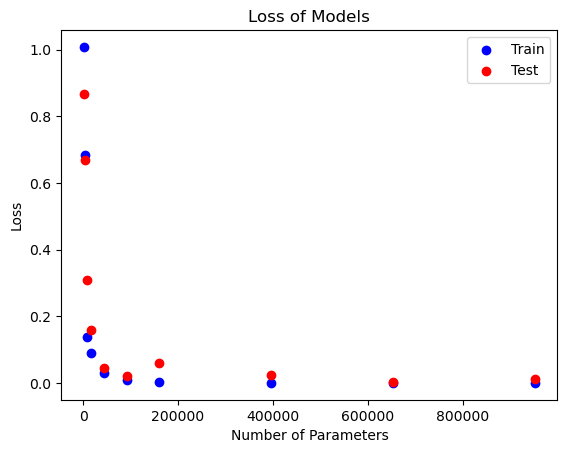

In [168]:
#Training Loss
plt.scatter(simple_model_params, train_loss_mod1,c='b',label='Train')
plt.scatter(larger_model_params, train_loss_mod2,c='b')
plt.scatter(deeper_model_params, train_losses_mod3,c='b')
plt.scatter(larger_model4_params, train_loss_mod4,c='b')
plt.scatter(complex_model5_params, train_loss_mod5,c='b')
plt.scatter(large_model6_params, train_loss_mod6,c='b')
plt.scatter(deep_model7_params, train_loss_mod7,c='b')
plt.scatter(large_model8_params, train_loss_mod8,c='b')
plt.scatter(large_model9_params,train_loss_mod9,c='b')
plt.scatter(large_model10_params, train_loss_mod10,c='b')

#Testing Loss

plt.scatter(simple_model_params, test_loss_mod1,c='r',label='Test')
plt.scatter(larger_model_params, test_loss_mod2,c='r')
plt.scatter(deeper_model_params, test_loss_mod3,c='r')
plt.scatter(larger_model4_params, test_loss_mod4,c='r')
plt.scatter(complex_model5_params, test_loss_mod5,c='r')
plt.scatter(large_model6_params, test_loss_mod6,c='r')
plt.scatter(deep_model7_params, test_loss_mod7,c='r')
plt.scatter(large_model8_params, test_loss_mod8,c='r')
plt.scatter(large_model9_params, test_loss_mod9,c='r')
plt.scatter(large_model10_params, test_loss_mod10,c='r')

plt.title("Loss of Models")
plt.xlabel("Number of Parameters")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()

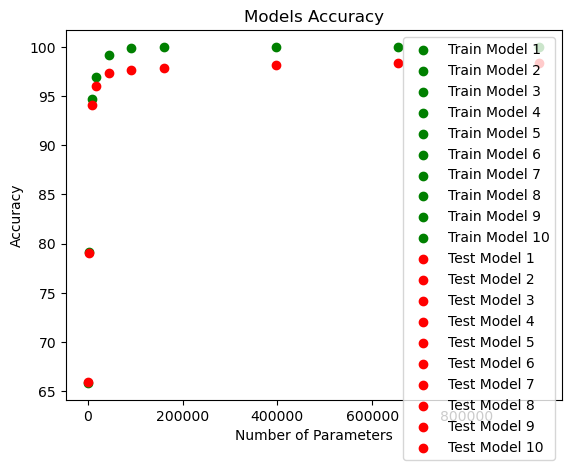

In [172]:
# Plotting Training Accuracy
plt.scatter(simple_model_params, trn_accu_mod1, c='green', label='Train Model 1')
plt.scatter(larger_model_params, trn_accu_mod2, c='green', label='Train Model 2')
plt.scatter(deeper_model_params, trn_accu_mod3, c='green', label='Train Model 3')
plt.scatter(larger_model4_params, trn_accu_mod4, c='green', label='Train Model 4')
plt.scatter(complex_model5_params, trn_accu_mod5, c='green', label='Train Model 5')
plt.scatter(large_model6_params, trn_accu_mod6, c='green', label='Train Model 6')
plt.scatter(deep_model7_params, trn_accu_mod7, c='green', label='Train Model 7')
plt.scatter(large_model8_params, trn_accu_mod8, c='green', label='Train Model 8')
plt.scatter(large_model9_params, trn_accu_mod9, c='green', label='Train Model 9')
plt.scatter(large_model10_params, trn_accu_mod10, c='green', label='Train Model 10')

# Plotting Testing Accuracy
plt.scatter(simple_model_params, tst_accu_mod1, c='red', label='Test Model 1')
plt.scatter(larger_model_params, test_accu_mod2, c='red', label='Test Model 2')
plt.scatter(deeper_model_params, tst_accu_mod3, c='red', label='Test Model 3')
plt.scatter(larger_model4_params, tst_accu_mod4, c='red', label='Test Model 4')
plt.scatter(complex_model5_params, tst_accu_mod5, c='red', label='Test Model 5')
plt.scatter(large_model6_params, tst_accu_mod6, c='red', label='Test Model 6')
plt.scatter(deep_model7_params, tst_accu_mod7, c='red', label='Test Model 7')
plt.scatter(large_model8_params, tst_accu_mod8, c='red', label='Test Model 8')
plt.scatter(large_model9_params, tst_accu_mod9, c='red', label='Test Model 9')
plt.scatter(large_model10_params, tst_accu_mod10, c='red', label='Test Model 10')

plt.title("Models Accuracy")
plt.xlabel("Number of Parameters")
plt.ylabel("Accuracy")
plt.legend(loc="upper right")
plt.show()
